In [104]:
import neurolab as nl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

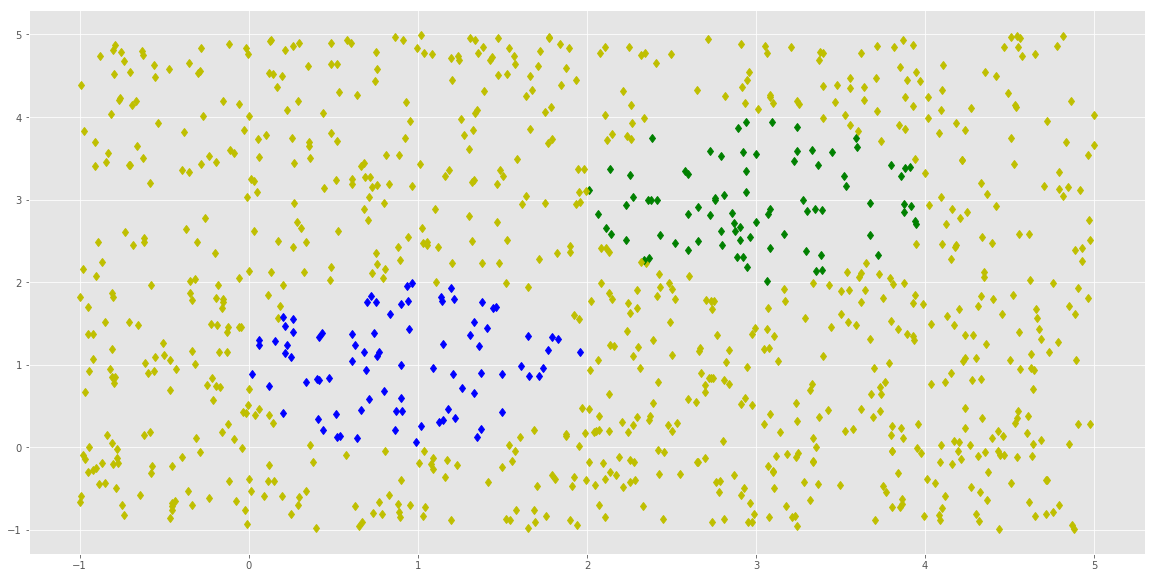

In [110]:
n = 1000
x = np.random.uniform(-1, 5, (n, 2))

target = np.empty([n, 3])

for i in range(n):
    if (x[i,0] - 1)**2 + (x[i, 1] - 1)**2 - 1 < 0:
        target[i] = [1, 0, 0]
    if (x[i,0] - 3)**2 + (x[i, 1] - 3)**2 - 1 < 0:
        target[i] = [0, 1, 0]
    if (x[i,0] - 1)**2 + (x[i, 1] - 1)**2 - 1 > 0 and (x[i,0] - 3)**2 + (x[i, 1] - 3)**2 - 1 > 0:
        target[i] = [0, 0, 1]

for i in range(n):
    if target[i][0] == 1:
        plt.plot(x[i, 0], x[i, 1], 'bd')
    elif target[i][1] == 1:
        plt.plot(x[i, 0], x[i, 1], 'gd')
    elif target[i][2] == 1:
        plt.plot(x[i, 0], x[i, 1], 'yd')

plt.show()

In [111]:
net = nl.net.newlvq(nl.tool.minmax(x), 50, [.3, .3, .4])
# Train network
error = net.train(x, target, epochs=1000, goal=-1)

n = 200
test = np.random.uniform(-1, 5, (n, 2))
output = net.sim(test)
output

/Users/Dmitry/anaconda3/envs/data_science_test/lib/python3.6/site-packages/neurolab/net.py:179: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  layer_out.np['w'][n][st:i].fill(1.0)


Epoch: 100; Error: 0.024;
Epoch: 200; Error: 0.03333333333333333;
Epoch: 300; Error: 0.03333333333333333;
Epoch: 400; Error: 0.037333333333333336;
Epoch: 500; Error: 0.034;
Epoch: 600; Error: 0.03333333333333333;
Epoch: 700; Error: 0.028666666666666667;
Epoch: 800; Error: 0.02666666666666667;
Epoch: 900; Error: 0.026;
Epoch: 1000; Error: 0.026;
The maximum number of train epochs is reached


array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.

In [112]:
xx, yy, zz = np.meshgrid(np.arange(-1, 5.4, 0.2), np.arange(-1, 5.4, 0.2), np.arange(-1, 5.4, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
zz.shape = zz.size, 1
i = np.concatenate((xx, yy), axis=1)
o = net.sim(i)
grid1 = i[o[:, 0]>0]
grid2 = i[o[:, 1]>0]
grid3 = i[o[:, 2]>0]
plt.plot(grid1[:,0], grid1[:,1], 'b+', grid2[:,0], grid2[:,1], 'g+', grid3[:,0], grid3[:,1], 'y+')

In [113]:
for i in range(n):
    if output[i][0] == 1:
        plt.plot(test[i, 0], test[i, 1], 'bd')
    elif output[i][1] == 1:
        plt.plot(test[i, 0], test[i, 1], 'gd')
    elif output[i][2] == 1:
        plt.plot(test[i, 0], test[i, 1], 'yd')
plt.axis([-2, 5.5, -2, 5.5])
plt.xlabel('Input[:, 0]')
plt.ylabel('Input[:, 1]')
plt.legend(['class 1', 'class 2', 'class 3', 'detected class 1', 'detected class 2', 'detected class 3'])

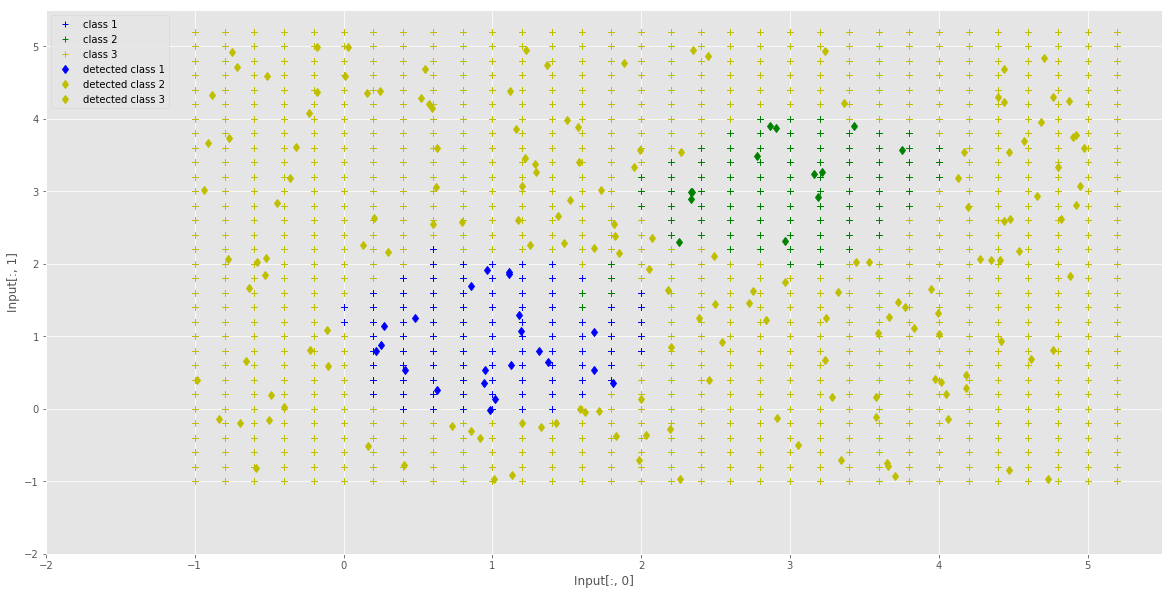

In [114]:
plt.show()